**SIMULATED ANNEALING ALGORITHM**

**berlin52 Dataset (Optimal Solution - 7542)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [ ]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [ ]:
coordinates = [
    (565, 575), (25, 185), (345, 750), (945, 685), (845, 655), (880, 660),
    (25, 230), (525, 1000), (580, 1175), (650, 1130), (1605, 620), (1220, 580),
    (1465, 200), (1530, 5), (845, 680), (725, 370), (145, 665), (415, 635),
    (510, 875), (560, 365), (300, 465), (520, 585), (480, 415), (835, 625),
    (975, 580), (1215, 245), (1320, 315), (1250, 400), (660, 180), (410, 250),
    (420, 555), (575, 665), (1150, 1160), (700, 580), (685, 595), (685, 610),
    (770, 610), (795, 645), (720, 635), (760, 650), (475, 960), (95, 260),
    (875, 920), (700, 500), (555, 815), (830, 485), (1170, 65), (830, 610),
    (605, 625), (595, 360), (1340, 725), (1740, 245)
]


**Simulated Annealing Algorithm**

In [ ]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [18, 42, 32, 10, 51, 13, 12, 46, 28, 15, 43, 36, 47, 23, 4, 5, 3, 14, 37, 39, 38, 33, 34, 35, 44, 9, 8, 7, 40, 49, 19, 29, 22, 17, 2, 31, 48, 45, 27, 25, 26, 50, 11, 24, 0, 21, 30, 20, 41, 1, 6, 16, 18]
Best Length: 10638.98
CPU Time: 2.2225 seconds


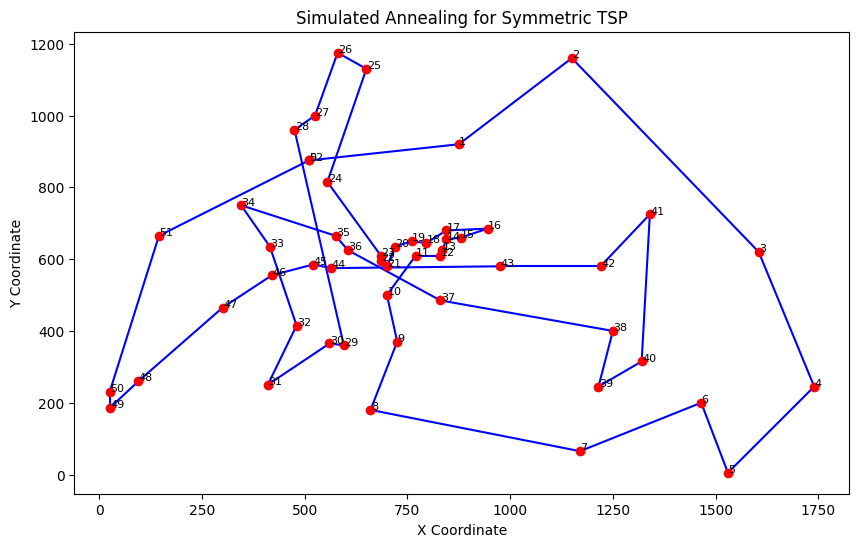

In [15]:
Simulated()

2nd

Best Tour: [35, 48, 21, 30, 20, 41, 6, 1, 13, 51, 10, 50, 3, 36, 0, 29, 28, 15, 45, 47, 23, 25, 26, 12, 46, 33, 34, 31, 18, 40, 7, 8, 9, 32, 11, 27, 24, 43, 49, 19, 22, 17, 16, 2, 44, 42, 14, 5, 4, 37, 39, 38, 35]
Best Length: 11887.77
CPU Time: 1.9682 seconds


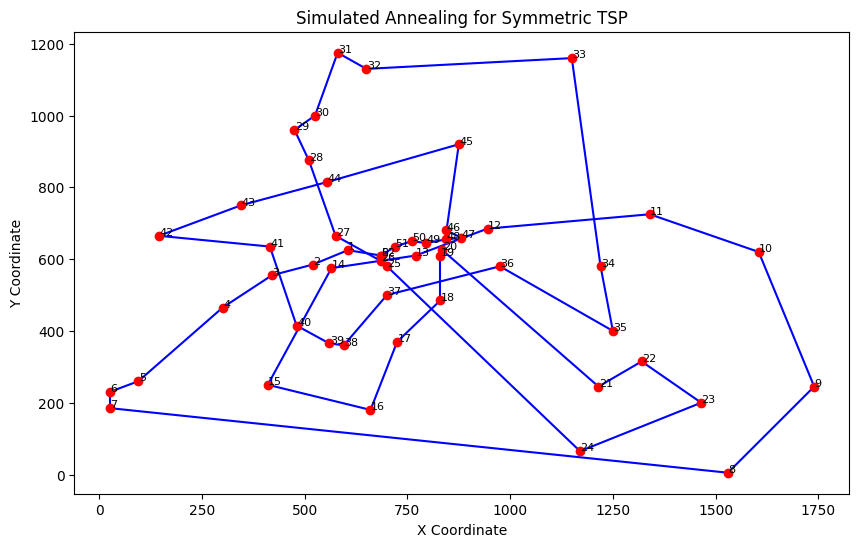

In [16]:
Simulated()

3rd

Best Tour: [12, 13, 51, 10, 50, 3, 0, 30, 20, 41, 1, 6, 16, 17, 21, 4, 5, 11, 26, 27, 24, 23, 47, 36, 45, 15, 49, 43, 33, 7, 40, 18, 44, 31, 48, 34, 35, 38, 39, 37, 14, 42, 32, 9, 8, 2, 22, 19, 29, 28, 46, 25, 12]
Best Length: 10628.49
CPU Time: 2.3698 seconds


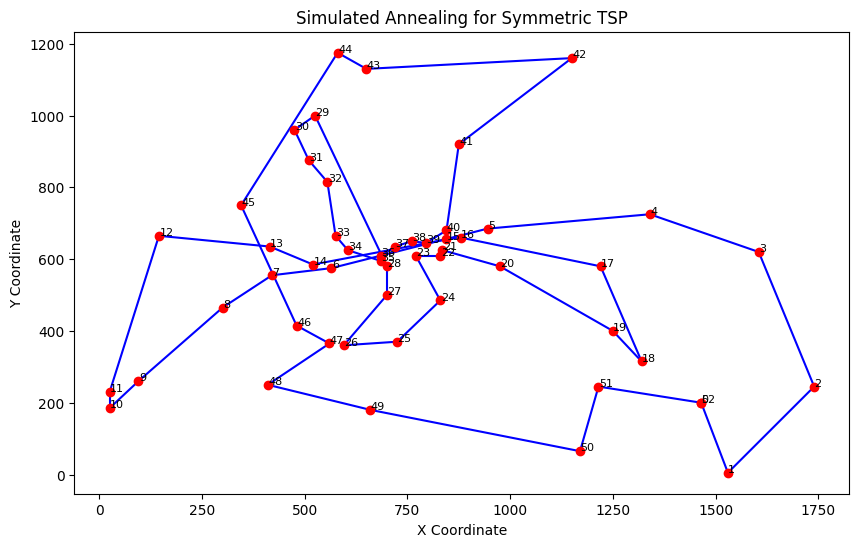

In [17]:
Simulated()

4th

Best Tour: [21, 31, 44, 18, 9, 8, 7, 40, 2, 16, 17, 0, 48, 35, 33, 26, 12, 13, 46, 25, 23, 4, 14, 42, 32, 10, 51, 27, 47, 36, 34, 38, 39, 37, 5, 3, 50, 11, 24, 45, 43, 15, 49, 19, 22, 28, 29, 1, 6, 41, 20, 30, 21]
Best Length: 10497.91
CPU Time: 2.3580 seconds


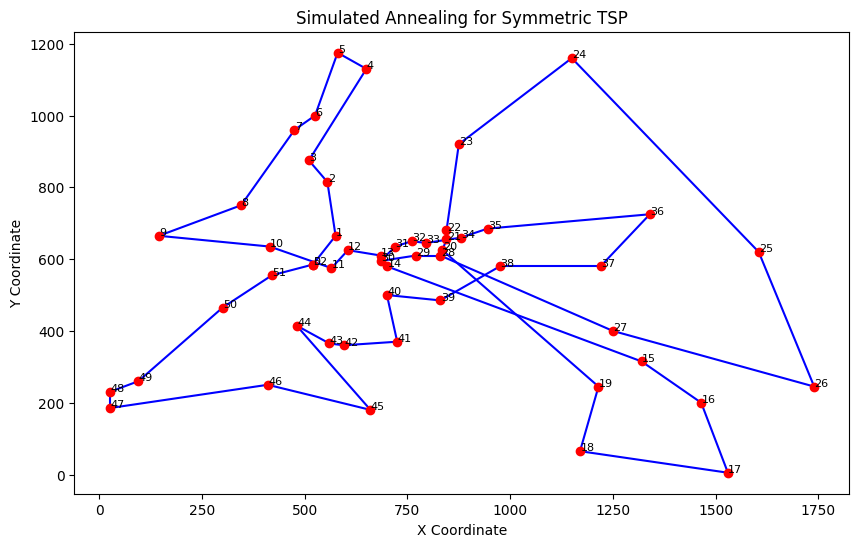

In [18]:
Simulated()

5th

Best Tour: [44, 18, 40, 16, 6, 1, 41, 29, 22, 15, 45, 24, 27, 25, 26, 12, 13, 46, 28, 19, 49, 43, 33, 34, 0, 21, 17, 2, 20, 30, 47, 23, 4, 5, 11, 51, 10, 50, 32, 3, 14, 42, 9, 8, 7, 31, 48, 35, 36, 37, 39, 38, 44]
Best Length: 10528.94
CPU Time: 1.9810 seconds


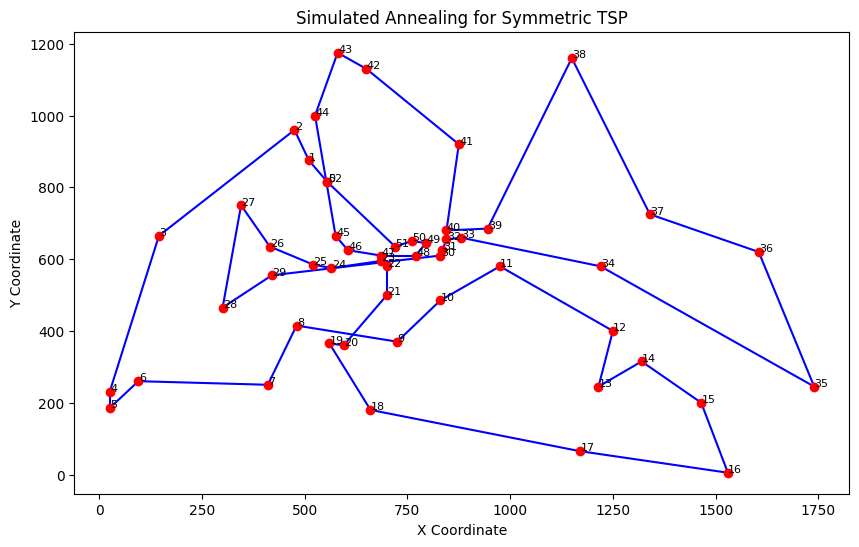

In [19]:
Simulated()

6th

Best Tour: [44, 18, 40, 7, 8, 9, 14, 5, 3, 11, 10, 51, 26, 4, 38, 34, 33, 43, 49, 19, 28, 46, 13, 12, 50, 32, 42, 37, 39, 36, 47, 23, 24, 27, 25, 45, 15, 29, 1, 6, 41, 20, 22, 0, 21, 30, 16, 2, 17, 31, 48, 35, 44]
Best Length: 10887.20
CPU Time: 1.7095 seconds


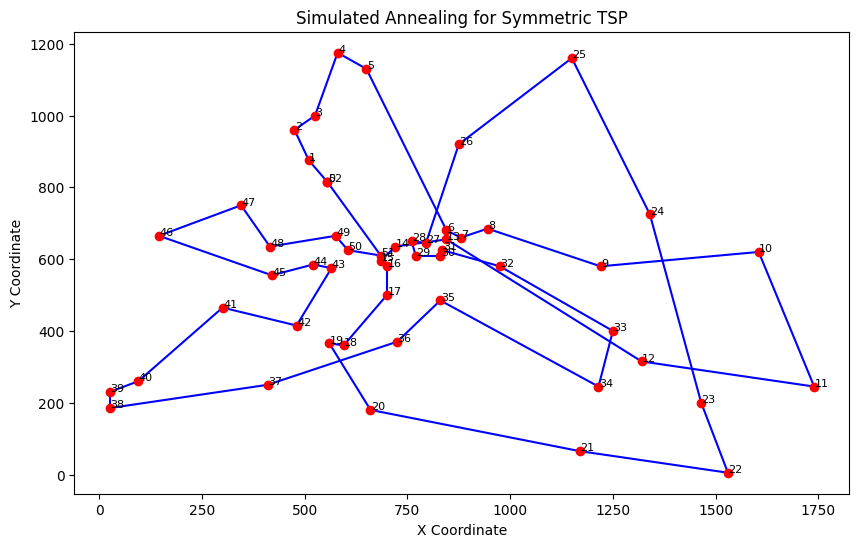

In [20]:
Simulated()

7th

Best Tour: [30, 21, 0, 34, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 11, 10, 51, 13, 46, 29, 1, 6, 41, 16, 20, 22, 19, 49, 28, 25, 12, 26, 27, 15, 43, 33, 38, 36, 45, 24, 3, 5, 47, 23, 4, 14, 37, 39, 35, 2, 17, 30]
Best Length: 9683.02
CPU Time: 1.8965 seconds


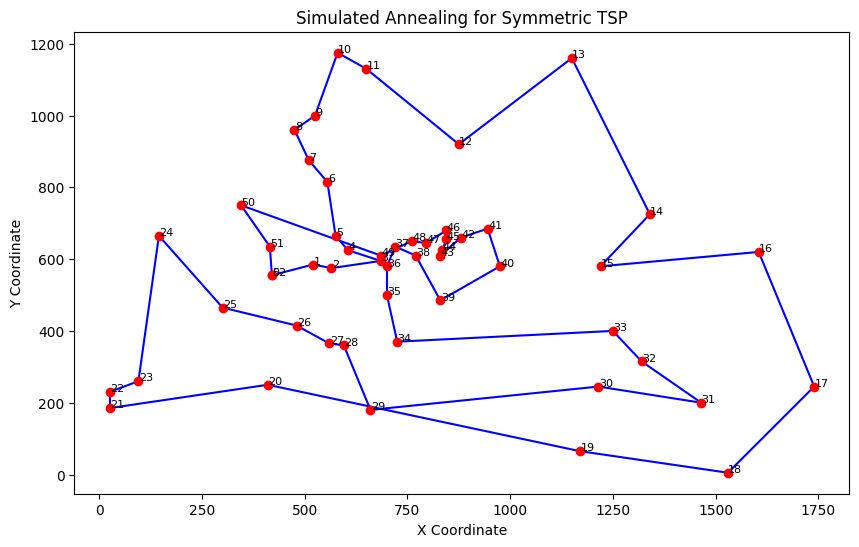

In [21]:
Simulated()

8th

Best Tour: [43, 33, 38, 35, 34, 0, 49, 19, 29, 22, 30, 17, 44, 18, 40, 7, 8, 9, 14, 4, 23, 37, 36, 39, 48, 31, 42, 32, 50, 10, 11, 21, 2, 16, 20, 41, 6, 1, 28, 46, 25, 13, 51, 12, 26, 27, 24, 3, 5, 47, 45, 15, 43]
Best Length: 10130.95
CPU Time: 2.4663 seconds


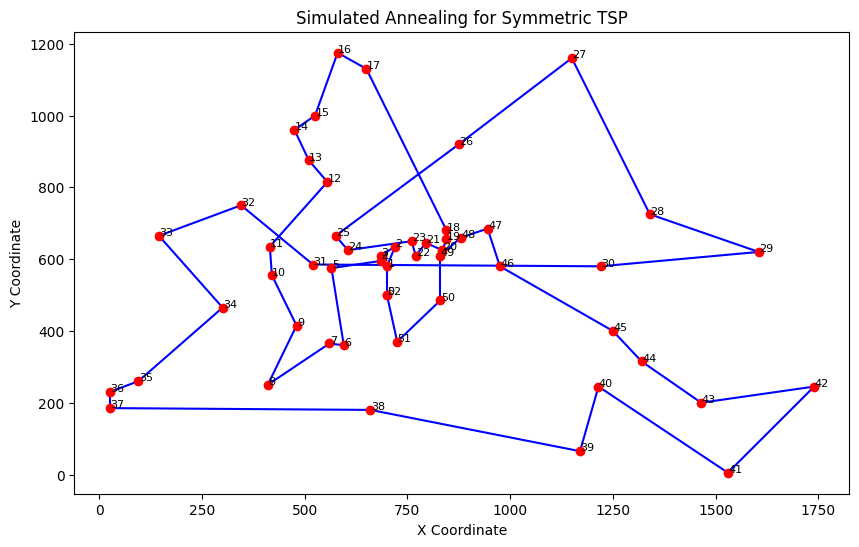

In [22]:
Simulated()

9th

Best Tour: [0, 21, 30, 20, 22, 19, 49, 47, 23, 14, 4, 45, 15, 43, 36, 37, 39, 38, 33, 34, 35, 42, 32, 50, 10, 11, 24, 3, 5, 7, 8, 9, 27, 26, 12, 51, 13, 25, 46, 28, 29, 1, 6, 41, 16, 17, 2, 40, 18, 44, 31, 48, 0]
Best Length: 10126.14
CPU Time: 1.7625 seconds


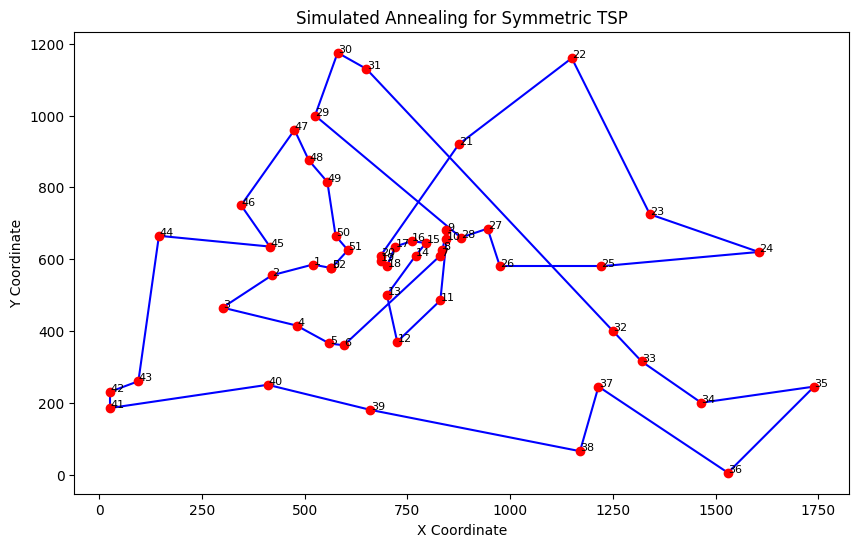

In [23]:
Simulated()

10th

Best Tour: [39, 37, 47, 23, 5, 24, 12, 13, 51, 10, 50, 3, 36, 34, 17, 30, 21, 0, 33, 43, 15, 49, 19, 22, 28, 46, 25, 26, 27, 11, 32, 8, 9, 42, 14, 4, 45, 29, 1, 6, 41, 20, 16, 2, 40, 7, 18, 44, 31, 48, 35, 38, 39]
Best Length: 9934.47
CPU Time: 1.7645 seconds


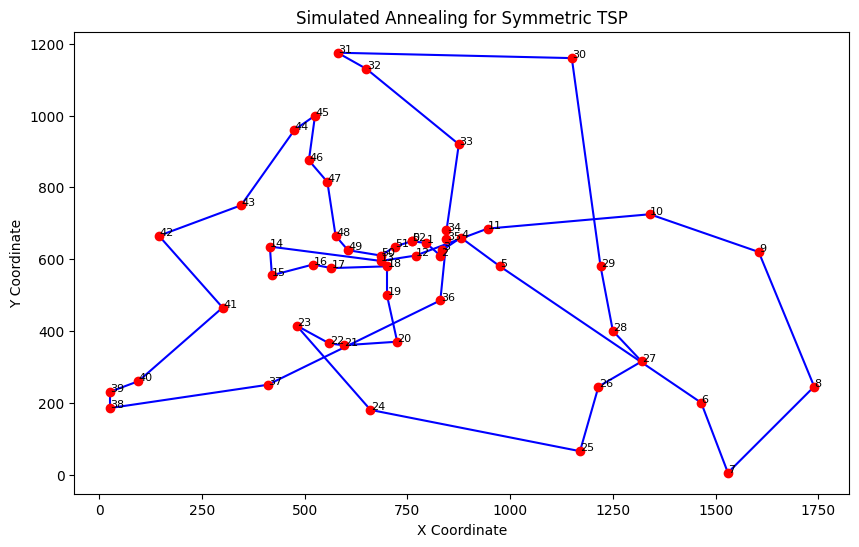

In [24]:
Simulated()